In [4]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

raw = open('../measurement/data.txt', 'r')
lines = raw.readlines()
data = []
for line in lines:
    data.append(int(line))

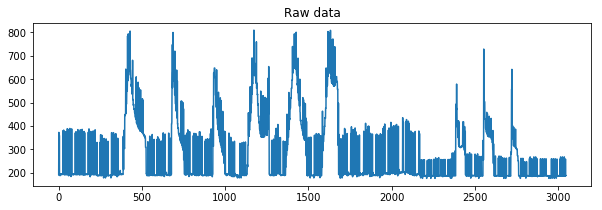

In [74]:
plt.figure(figsize=(10,3))
plt.plot(data)
plt.title('Raw data')
plt.show()

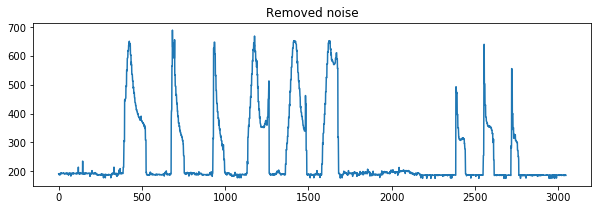

In [75]:
filtered = []
for index in range(1,len(data)-1):
    magnitude = (data[index+1]-data[index]) + (data[index]-data[index-1])
    absolute = abs(data[index+1]-data[index]) + abs(data[index]-data[index-1])
    delta = abs(absolute)-abs(magnitude)
    filtered.append(data[index] if delta < 100 else (data[index-1] + data[index+1])/2)
    
plt.figure(figsize=(10,3))
plt.plot(filtered)
plt.title('Removed noise')
plt.show()

In [39]:
segments = []
segmentBuffer = []
useNewSegment = True
for index in range(len(filtered)):
    if filtered[index] < 250:
        useNewSegment = True
    else:
        if useNewSegment:
            if len(segmentBuffer) > 0:
                segments.append(segmentBuffer)
            segmentBuffer = []
            useNewSegment=False
        segmentBuffer.append(filtered[index])

In [ ]:
for segmentId, segment in enumerate(segments):
    plt.plot(segment)
    plt.title('Data for gesture ' + str(segmentId+1))
    plt.show()

In [83]:
slopes = []
for segmentId, segment in enumerate(segments):
    rawSlope = []
    for index in range (1, len(segment)):
        slope = segment[index] - segment[index-1]
        rawSlope.append(slope)
    averageSlope = []
    for index in range (3, len(rawSlope)):
        average = (rawSlope[index] + rawSlope[index-1] + rawSlope[index-2] + rawSlope[index-3])/4
        # Clear first 10 elements
        averageSlope.append(average if index > 10 else 0)
    # The average was delayed by 3 elements, fix the alignment:
    averageSlope = [0,0,0] + averageSlope
    slopes.append(averageSlope)
    

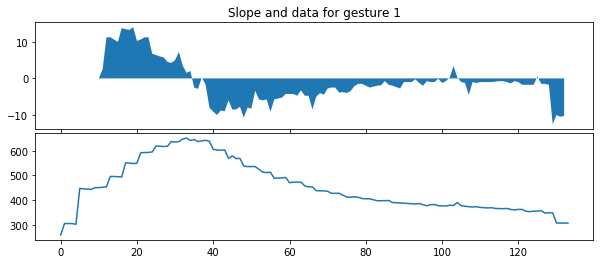

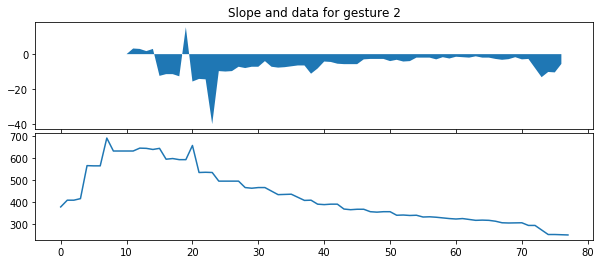

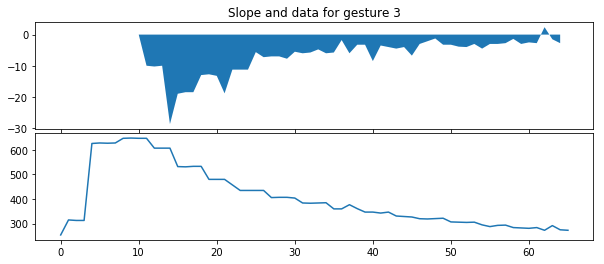

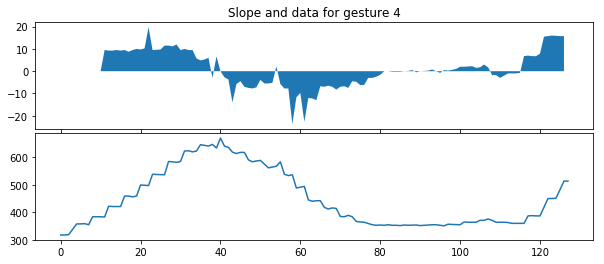

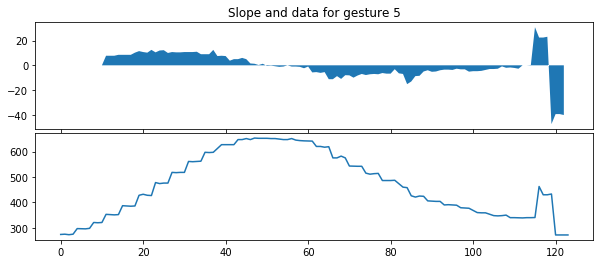

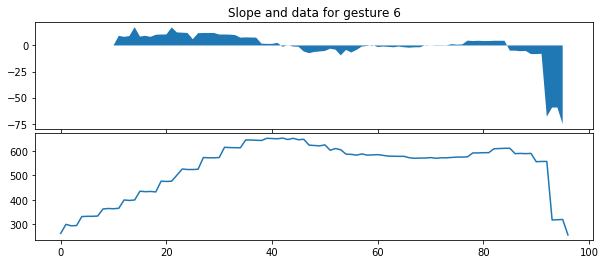

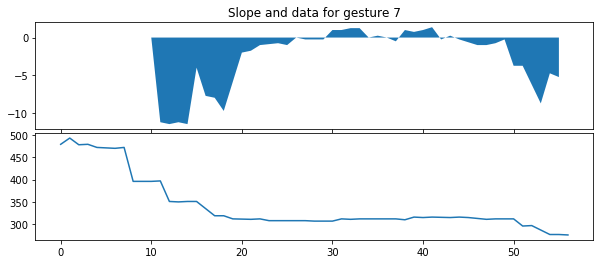

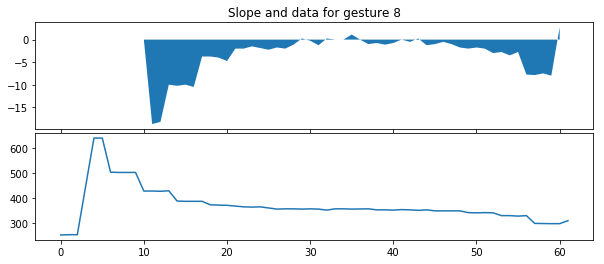

In [86]:
for segmentId in range(len(slopes)):
    averageSlope = slopes[segmentId]
    segment = segments[segmentId]
    
    multi, (plot1, plot2) = plt.subplots(2, sharex=True, sharey=False, figsize=(10,4))
    plot1.set_title('Slope and data for gesture ' + str(segmentId+1))
    plot1.fill_between(range(len(averageSlope)), averageSlope, [0]*len(averageSlope))
    plot2.plot(segment)
    multi.subplots_adjust(hspace=0.04)
plt.show()